In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf
from keras.datasets import mnist

In [2]:
import numpy as np

import matplotlib.pyplot as plt



import keras

from keras.models import Model

from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, UpSampling2D, Input, Dense, Activation, Flatten, Reshape

from keras.utils import np_utils


from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

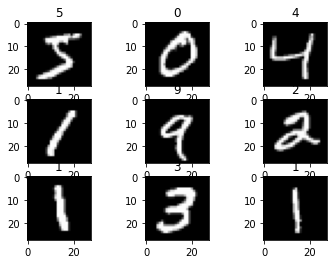

In [4]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.title(str(y_train[i]))
pyplot.show()

In [5]:
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))

X_train.shape

(60000, 28, 28, 1)

In [6]:
#Convolutive Autoencoder(CAE):

e = 256



inp = Input(shape=(28,28,1))

conv1 = Conv2D(32, (3,3), activation='relu')(inp)

conv2 = Conv2D(16, (3,3), activation='relu')(conv1)

mp1   = MaxPool2D((2,2))(conv2)

conv3 = Conv2D(8, (3,3), activation='relu')(mp1)



flat = Flatten()(conv3)

emb = Dense(e, activation='sigmoid')(flat)


fc1 = Dense(800, activation='sigmoid')(emb)

res = Reshape((10,10,8))(fc1)



zp1 = ZeroPadding2D((1,1))(res)

conv4 = Conv2D(16, (3,3), padding='same', activation='relu')(zp1)

up1 = UpSampling2D((2,2))(conv4)

zp2 = ZeroPadding2D((1,1))(up1)

conv5 = Conv2D(32, (3,3), padding='same', activation='relu')(zp2)

zp3 = ZeroPadding2D((1,1))(conv5)

conv6 = Conv2D(1, (3,3), padding='same', activation='relu')(zp3)


In [7]:
cae = Model(inputs=inp, outputs=conv6)

cae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                             

In [8]:
cae.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [13]:
hist = cae.fit(X_train, X_train,

        shuffle=True,

        epochs=10,

        validation_data=(X_test, X_test),

        batch_size=128

       )

Epoch 1/10
469/469 [==============================] - 88s 186ms/step - loss: 0.0210 - accuracy: 0.8110 - val_loss: 0.0071 - val_accuracy: 0.8139
Epoch 2/10
469/469 [==============================] - 89s 190ms/step - loss: 0.0057 - accuracy: 0.8149 - val_loss: 0.0046 - val_accuracy: 0.8141
Epoch 3/10
469/469 [==============================] - 89s 189ms/step - loss: 0.0042 - accuracy: 0.8152 - val_loss: 0.0036 - val_accuracy: 0.8143
Epoch 4/10
469/469 [==============================] - 89s 190ms/step - loss: 0.0035 - accuracy: 0.8153 - val_loss: 0.0032 - val_accuracy: 0.8144
Epoch 5/10
469/469 [==============================] - 90s 191ms/step - loss: 0.0031 - accuracy: 0.8153 - val_loss: 0.0029 - val_accuracy: 0.8144
Epoch 6/10
469/469 [==============================] - 91s 194ms/step - loss: 0.0028 - accuracy: 0.8154 - val_loss: 0.0025 - val_accuracy: 0.8144
Epoch 7/10
469/469 [==============================] - 98s 210ms/step - loss: 0.0025 - accuracy: 0.8154 - val_loss: 0.0025 - val_ac

In [15]:
preds = cae.predict(X_test)
preds[0,:,:,:]

array([[[0.01443226],
        [0.00935352],
        [0.00986686],
        [0.01818621],
        [0.00712849],
        [0.01524069],
        [0.00135688],
        [0.0092998 ],
        [0.01283668],
        [0.01252493],
        [0.01451684],
        [0.01612388],
        [0.02606978],
        [0.02001991],
        [0.01118199],
        [0.01681067],
        [0.01598848],
        [0.01598734],
        [0.01574819],
        [0.01429297],
        [0.01262645],
        [0.01469177],
        [0.01680532],
        [0.00185838],
        [0.00174016],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.03097604],
        [0.00612407],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.0178543 ],
        [0.        ],
        [0.00569418],
        [0.01756104],
        [0.01038752],
        [0.01245481],
        [0.02329089],
        [0.02253187],
        [0.02003819],
        [0.01763267],
        [0.03216599],
        [0.02687871],
        

In [9]:
#CNN:

from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Make sure images have shape (28, 28, 1)

print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 20s 46ms/step - loss: 0.3656 - accuracy: 0.8865 - val_loss: 0.0865 - val_accuracy: 0.9757
Epoch 2/5
422/422 [==============================] - 22s 51ms/step - loss: 0.1155 - accuracy: 0.9644 - val_loss: 0.0588 - val_accuracy: 0.9845
Epoch 3/5
422/422 [==============================] - 20s 48ms/step - loss: 0.0875 - accuracy: 0.9732 - val_loss: 0.0471 - val_accuracy: 0.9878
Epoch 4/5
422/422 [==============================] - 20s 47ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 0.0434 - val_accuracy: 0.9888
Epoch 5/5
422/422 [==============================] - 19s 45ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.0397 - val_accuracy: 0.9895


In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03655172139406204
Test accuracy: 0.9873999953269958


In [19]:
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


In [20]:
preds = cae.predict(X_test)
preds.shape

(10000, 28, 28, 1)

In [21]:
import keras.backend as K

In [ ]:
get_embed_layer_output = K.function([cae.layers[0].input],
                                  [cae.layers[7].output])
layer_output = get_embed_layer_output([X_test])

2021-12-01 01:15:55.278399: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 865280000 exceeds 10% of free system memory.
2021-12-01 01:15:56.048441: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 865280000 exceeds 10% of free system memory.


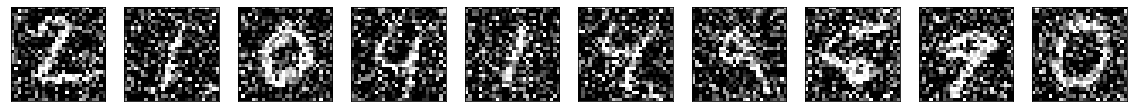

In [66]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = pyplot.subplot(1, n, i)
    pyplot.imshow(X_test_noisy[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()